Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [27]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
#Creamos nueva variable square meters, conviertiendola de pies a metros
airbnb$Square.Meters<-airbnb$Square.Feet*0.092903

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [29]:
#Utilizamos dplyr para filtrar las columnas
library(dplyr)
df_airbnb= airbnb %>% 
select(City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude)

In [30]:
head(df_airbnb)

City      Room.Type       Neighbourhood       Accommodates Bathrooms Bedrooms
1 Barcelona Entire home/apt El Gòtic            2            1         0       
2 Barcelona Entire home/apt El Raval            6            1         2       
3 Barcelona Entire home/apt Dreta de l'Eixample 5            1         2       
4 Barcelona Entire home/apt La Sagrada Família  5            1         2       
5 Barcelona Entire home/apt La Sagrada Família  6            1         2       
6 Barcelona Entire home/apt Sants-Montjuïc      5            2         3       
  Beds Price Square.Meters Guests.Included Extra.People Review.Scores.Rating
1 1    349   NA            1                0            NA                 
2 3    165   NA            4               20            93                 
3 2    129   NA            3               20            94                 
4 2     90   NA            1                0           100                 
5 3     89   NA            1                0           100                 
6 3     68   NA            1                0            84                 
  Latitude Longitude
1 41.38389 2.171802 
2 41.38266 2.167558 
3 41.38847 2.168451 
4 41.40259 2.176946 
5 41.40501 2.173369 
6 41.36726 2.147609

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [77]:
#Realizamos los filtros y también filtramos madrid para que no entren datos de otras ciudades. Seleccionamos de nuevo las variables
df_madrid=df_airbnb %>% 
  filter(Room.Type=='Entire home/apt' & !is.na(Neighbourhood) & City=='Madrid')%>% 
  select(Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude, Longitude)

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [78]:
prop.table(table(is.na(df_madrid$Square.Meters)))[2] *100

TRUE 
95.48273

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [79]:
prop.table(table(df_madrid$Square.Meters[!is.na(df_madrid$Square.Meters)]))['0']*100

0 
36.41457

Reemplazar todos los 0m^2 por NA 

In [80]:
df_madrid$Square.Meters[df_madrid$Square.Meters==0] <- NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

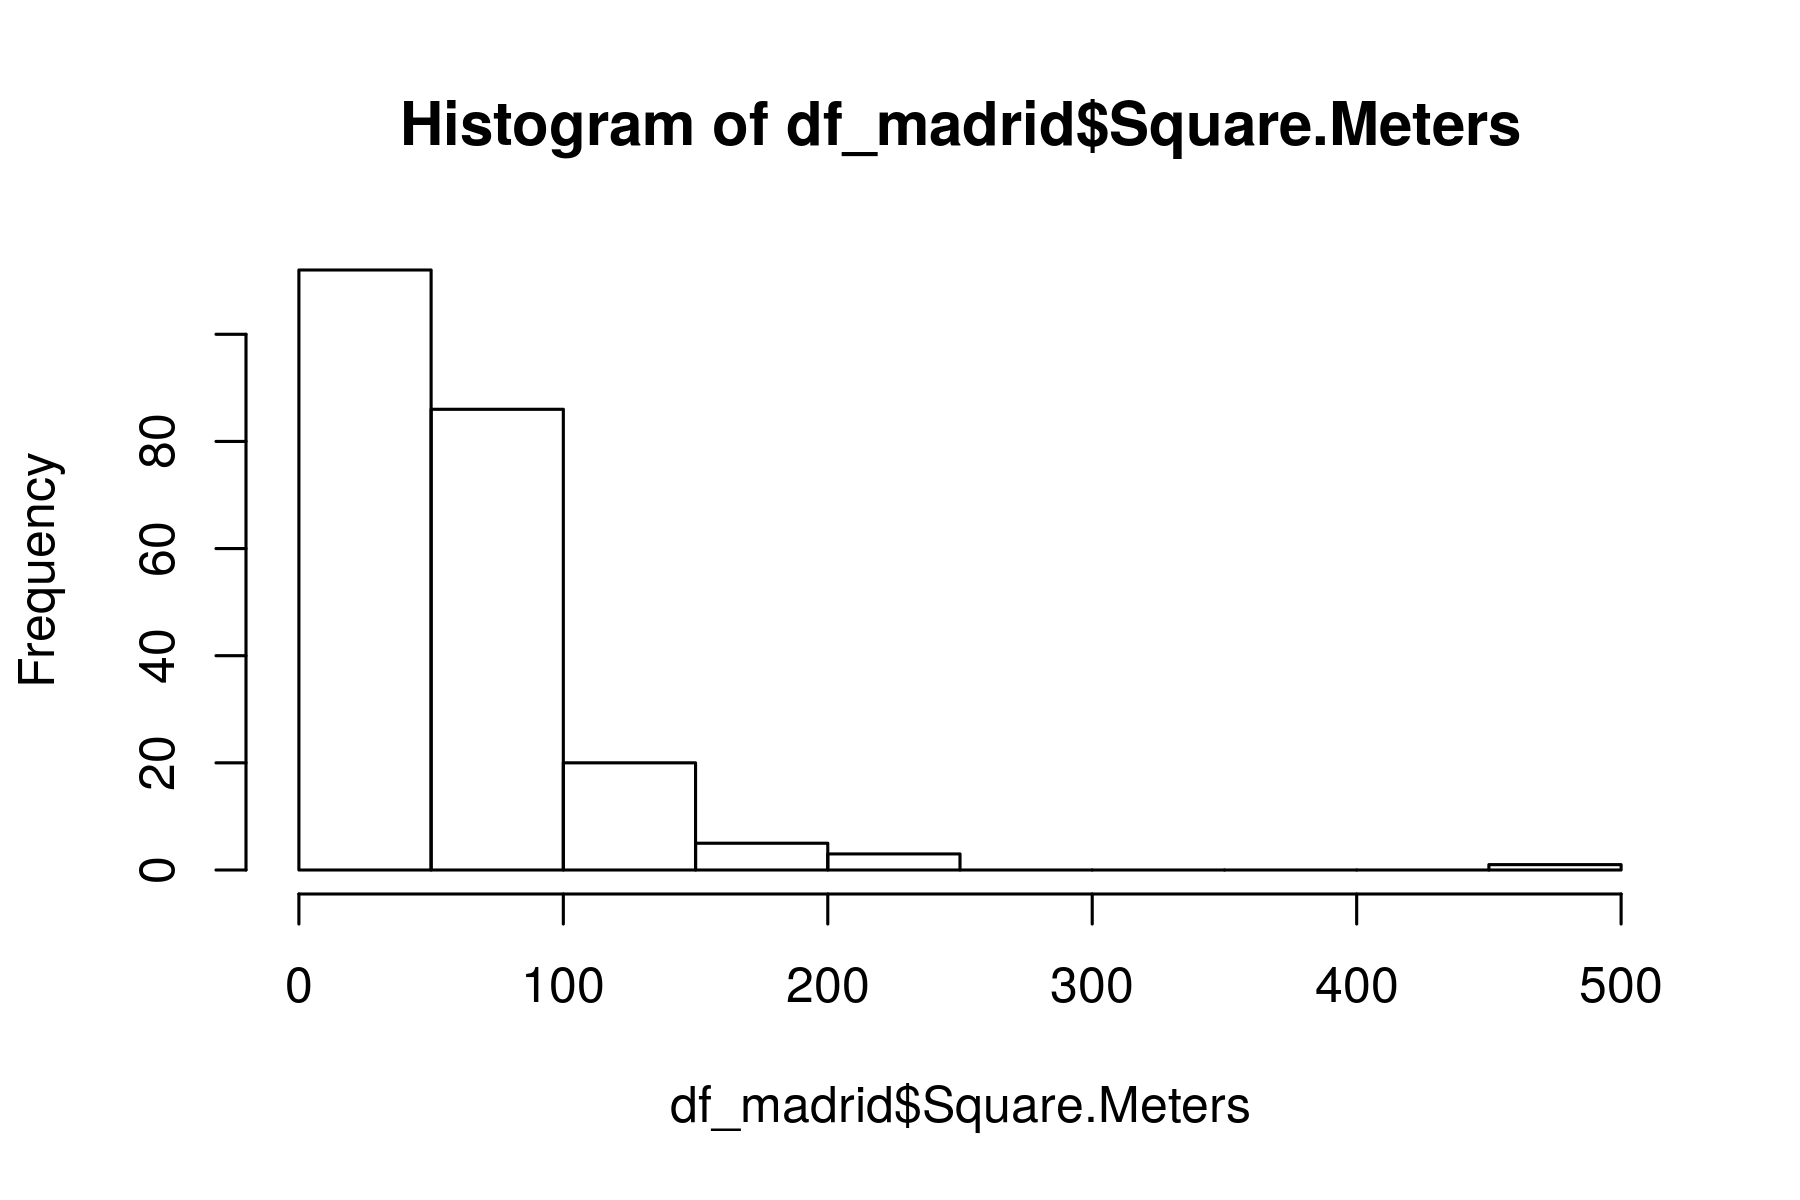

In [81]:
hist(df_madrid$Square.Meters,10)

In [82]:
#Vamos a ver la distribución de la variable de metros cuadrados
summary(df_madrid$Square.Meters)
#vemos como hay un porcentaje pequeño de apartamentos con valores muy pequeños

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.044  30.008  52.026  58.659  74.973 480.030    7676 

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [84]:
df_madrid$Square.Meters[df_madrid$Square.Meters<20] <- NA
summary(df_madrid$Square.Meters)
#Vemos cómo hay valores de al menos 20 metros cuadrados

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.02   44.97   60.02   71.42   81.52  480.03    7721 

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


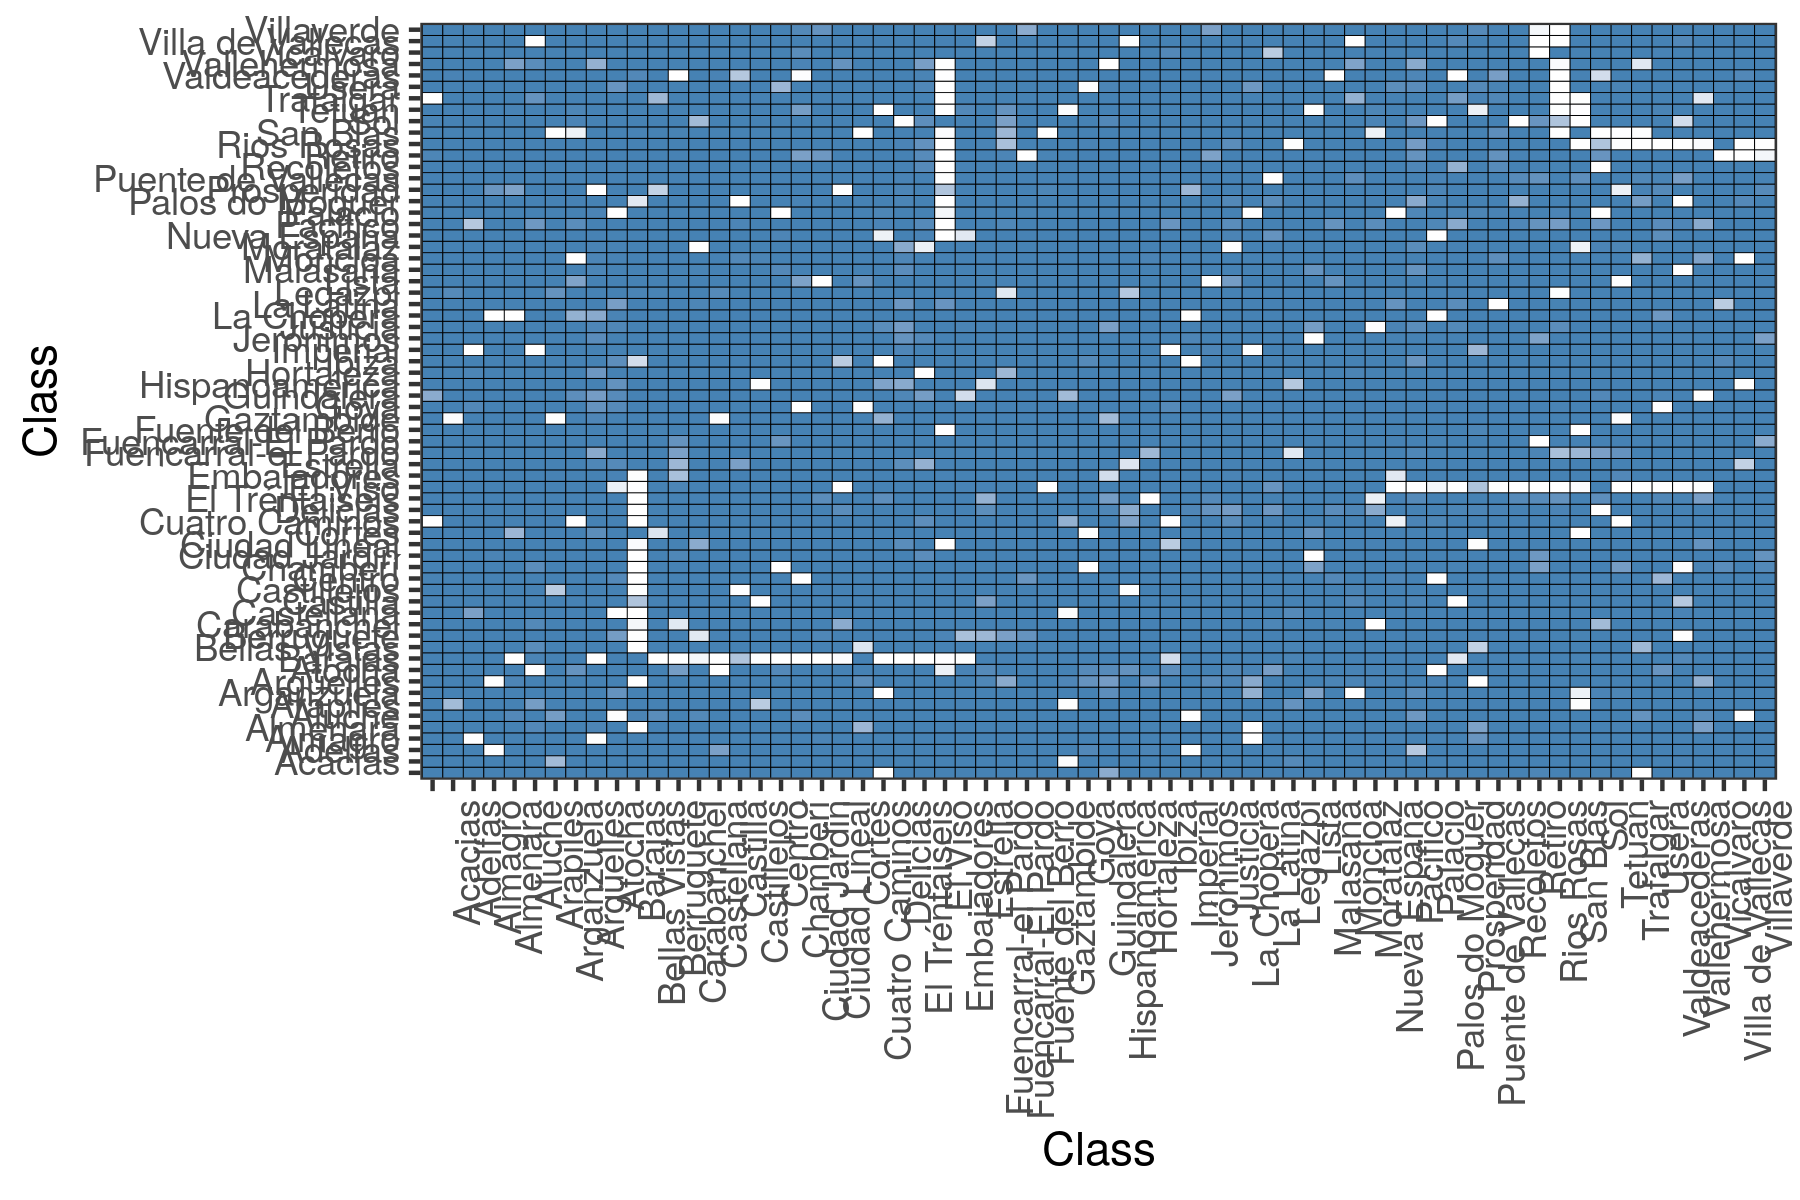

In [85]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


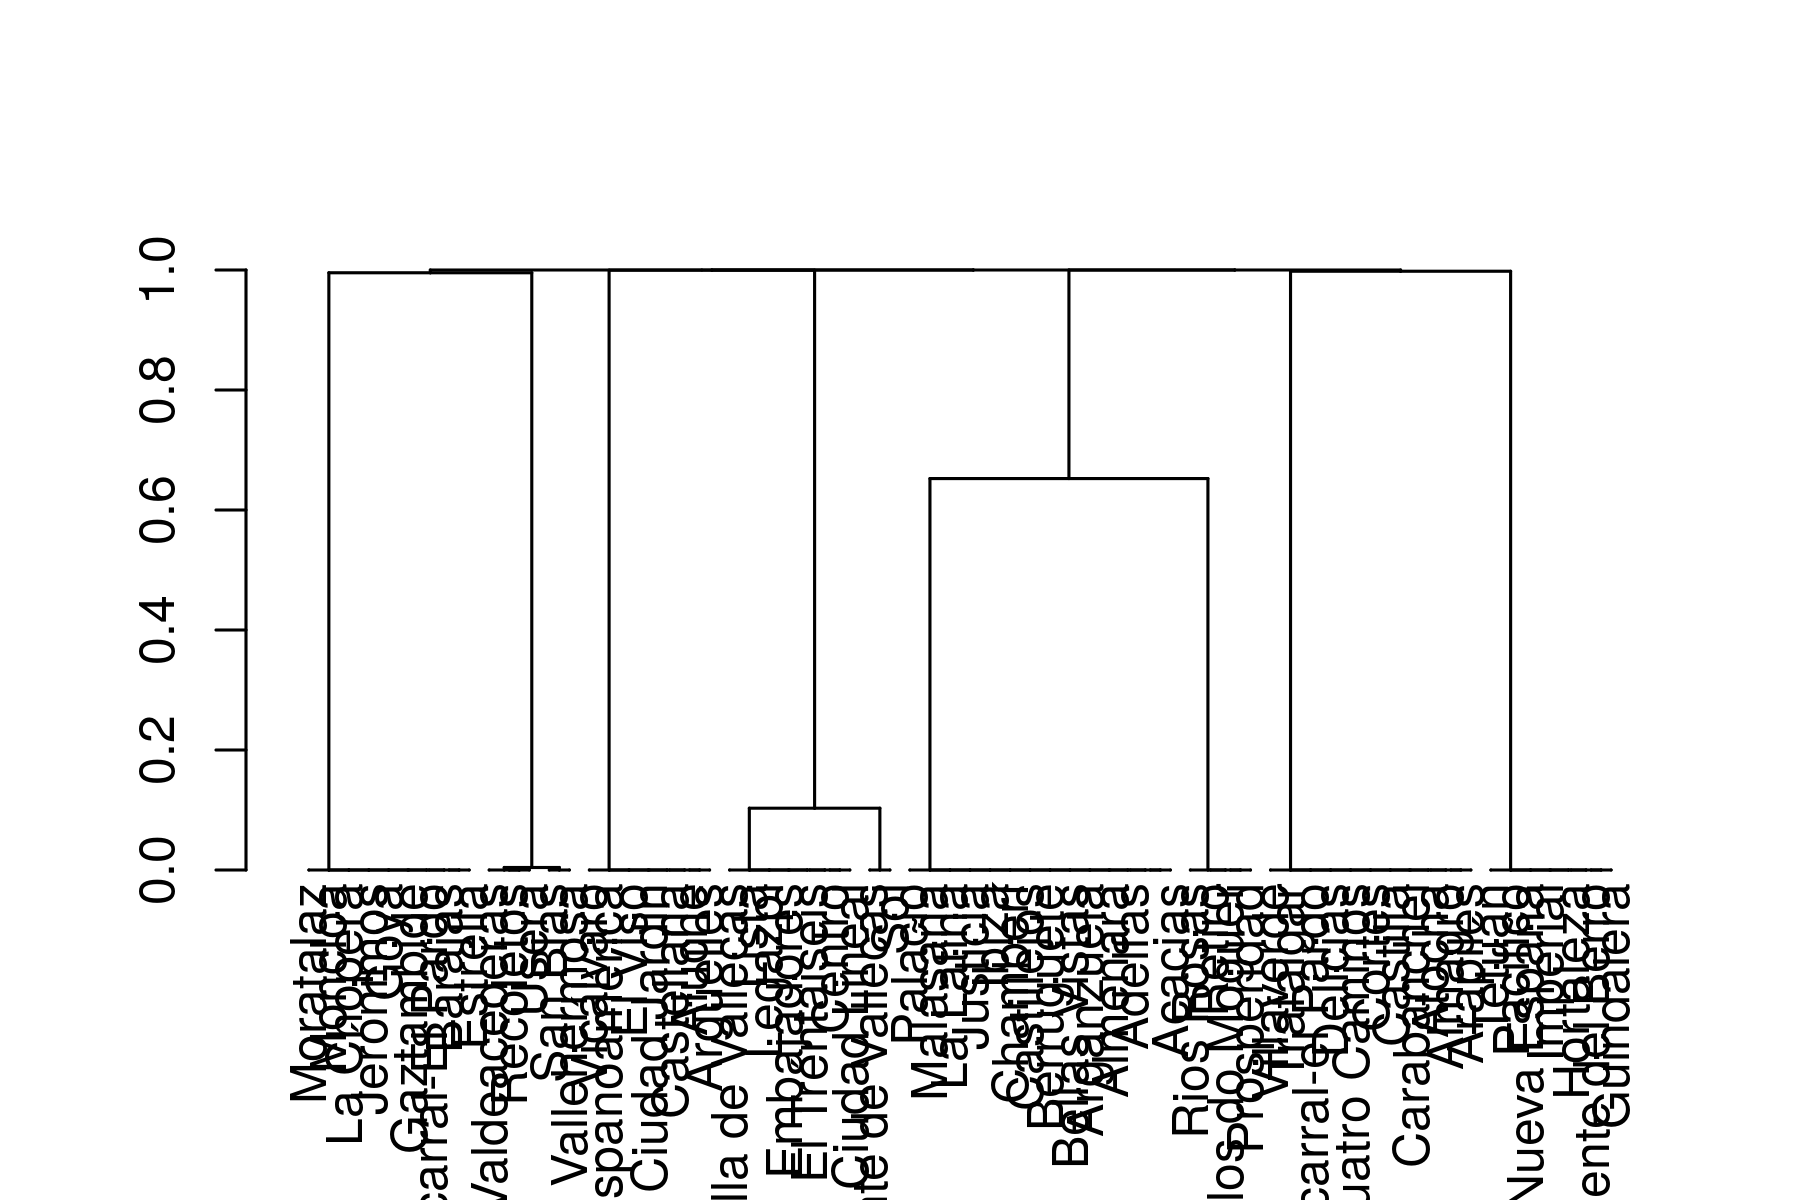

In [86]:
#usando el mismo procedimiento que en clase, y utilizando la métrica calculada en la matriz de tukey del punto más arriba, pintamos el dendrograma:
d <-  as.dist(1 - resm)
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

#### Como idea general podemos ver el número de clusters que pueden aparecer y cómo se subdividen los barrios

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

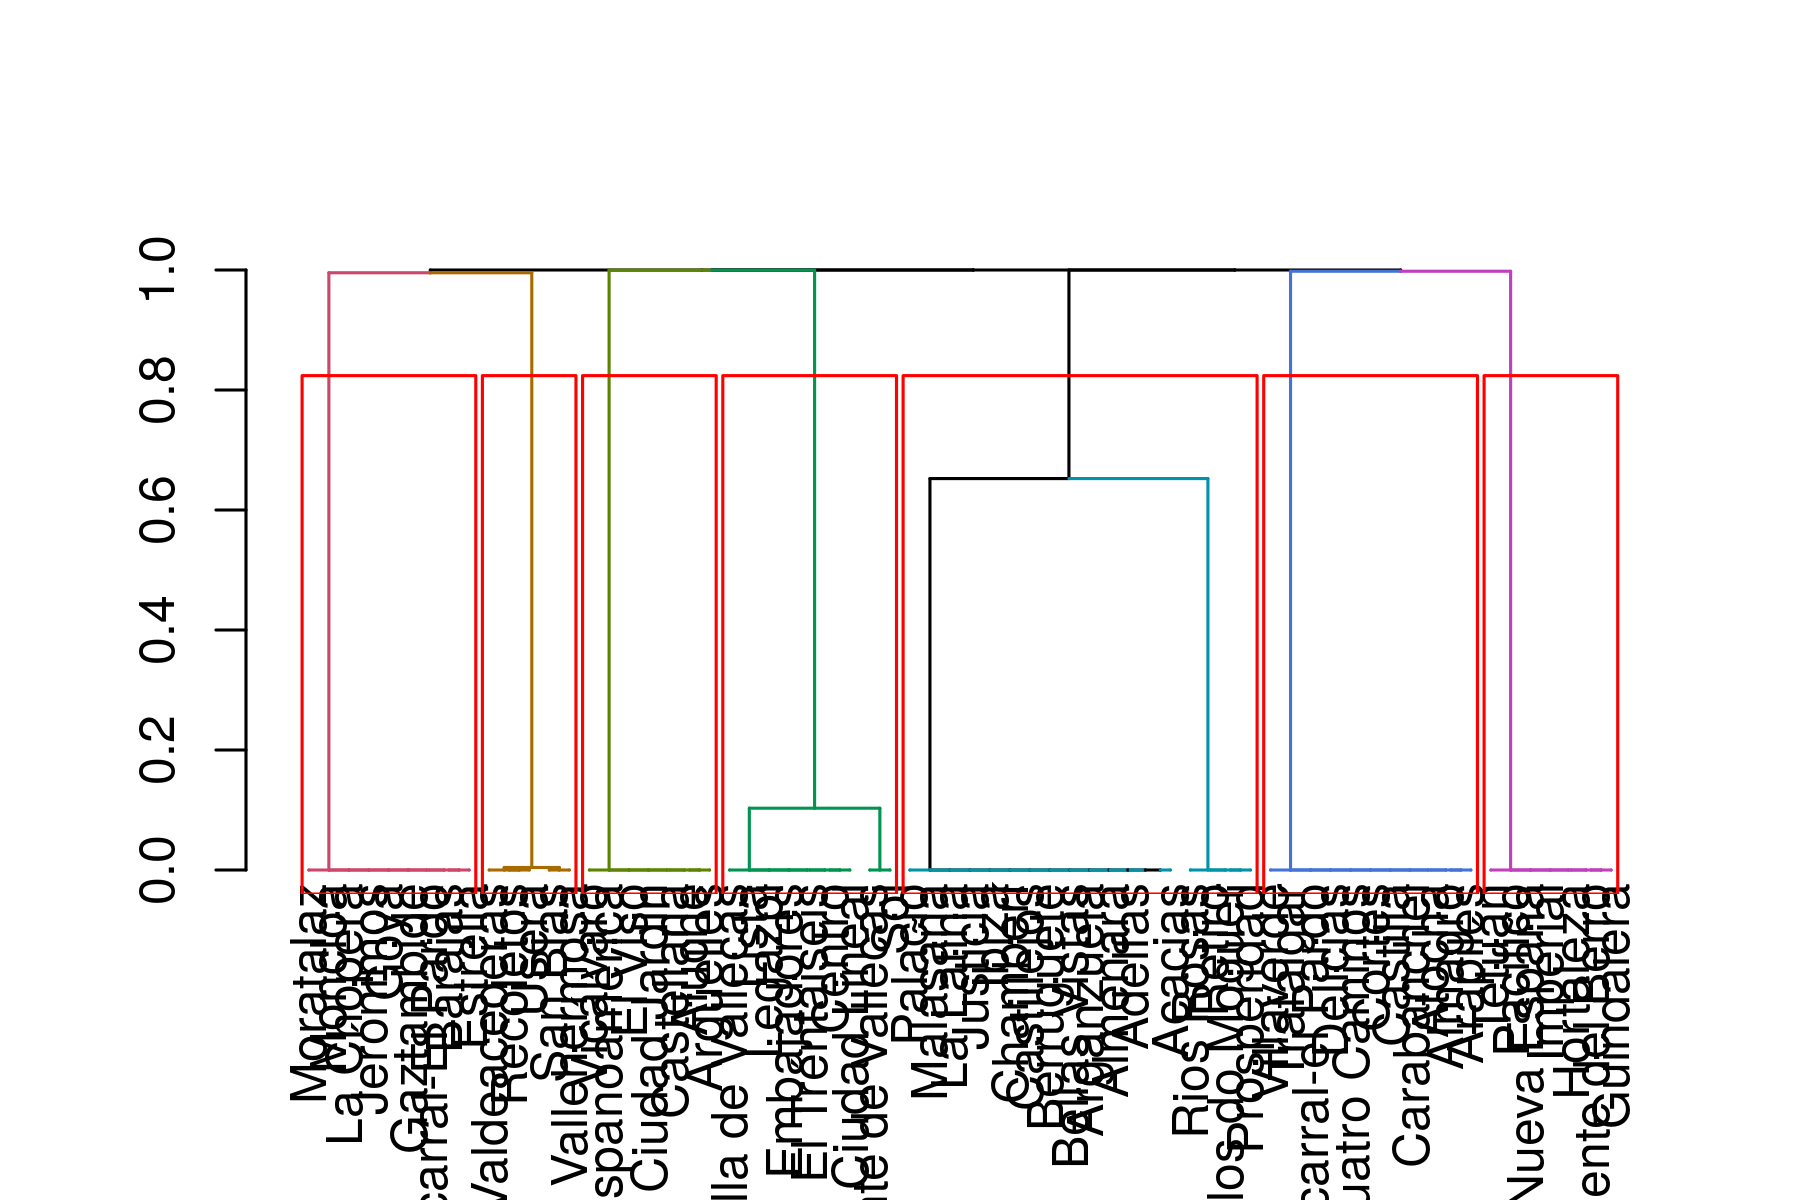

In [87]:
d <-  as.dist(1 - resm)
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
library(dendextend)
plot(color_branches(hcd,h=0.9))

ncluster=rect.hclust(hc,h=0.9)

#Vemos cómo nos quedan 7 clusters

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [88]:
cls = cutree(hcd,h=0.9)
d2 <- data.frame('Neighbourhood'=names(cls),'neighb_id'=cls)
df_madrid <- merge(df_madrid, d2, by='Neighbourhood')

In [89]:
str(df_madrid)

'data.frame':	7903 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Accommodates        : int  4 2 2 7 4 5 5 5 4 4 ...
 $ Bathrooms           : num  1 1 1 2 2 2 1 1 2 1 ...
 $ Bedrooms            : int  1 1 1 2 2 2 3 2 2 1 ...
 $ Beds                : int  2 1 1 6 2 2 3 5 2 2 ...
 $ Price               : int  130 70 90 180 65 65 115 58 150 69 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  1 1 2 4 2 1 4 3 4 1 ...
 $ Extra.People        : int  60 0 0 20 15 0 0 10 50 0 ...
 $ Review.Scores.Rating: int  NA 96 100 90 99 100 NA 89 91 NA ...
 $ Latitude            : num  40.5 40.4 40.5 40.4 40.4 ...
 $ Longitude           : num  -3.69 -3.7 -3.7 -3.69 -3.7 ...
 $ neighb_id           : int  1 1 1 1 1 1 1 1 1 1 ...


In [90]:
#Antes de meter la variable al modelo, la convertimos a factor
df_madrid$neighb_id =factor(df_madrid$neighb_id)
str(df_madrid)

'data.frame':	7903 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Accommodates        : int  4 2 2 7 4 5 5 5 4 4 ...
 $ Bathrooms           : num  1 1 1 2 2 2 1 1 2 1 ...
 $ Bedrooms            : int  1 1 1 2 2 2 3 2 2 1 ...
 $ Beds                : int  2 1 1 6 2 2 3 5 2 2 ...
 $ Price               : int  130 70 90 180 65 65 115 58 150 69 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  1 1 2 4 2 1 4 3 4 1 ...
 $ Extra.People        : int  60 0 0 20 15 0 0 10 50 0 ...
 $ Review.Scores.Rating: int  NA 96 100 90 99 100 NA 89 91 NA ...
 $ Latitude            : num  40.5 40.4 40.5 40.4 40.4 ...
 $ Longitude           : num  -3.69 -3.7 -3.7 -3.69 -3.7 ...
 $ neighb_id           : Factor w/ 7 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


In [91]:
table(df_madrid$neighb_id)
#Vemos la distribución de cada barrio


   1    2    3    4    5    6    7 
4633  947  319  249 1338  234  183 

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [92]:
#Dividimos los conjuntos de train y test en 70 y 30 %
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.70)
train<-df_madrid[idx,]
test<-df_madrid[-idx,]
str(df_madrid)

'data.frame':	7903 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Accommodates        : int  4 2 2 7 4 5 5 5 4 4 ...
 $ Bathrooms           : num  1 1 1 2 2 2 1 1 2 1 ...
 $ Bedrooms            : int  1 1 1 2 2 2 3 2 2 1 ...
 $ Beds                : int  2 1 1 6 2 2 3 5 2 2 ...
 $ Price               : int  130 70 90 180 65 65 115 58 150 69 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  1 1 2 4 2 1 4 3 4 1 ...
 $ Extra.People        : int  60 0 0 20 15 0 0 10 50 0 ...
 $ Review.Scores.Rating: int  NA 96 100 90 99 100 NA 89 91 NA ...
 $ Latitude            : num  40.5 40.4 40.5 40.4 40.4 ...
 $ Longitude           : num  -3.69 -3.7 -3.7 -3.69 -3.7 ...
 $ neighb_id           : Factor w/ 7 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


In [93]:
#Creamos un modelo de regresión lineal con las variables del dataset que tienen influencia en el cálculo de metros cuadrados:
modelo_metros= lm(Square.Meters~Bedrooms+Price+Accommodates+neighb_id,data=df_madrid)

summary(modelo_metros)


Call:
lm(formula = Square.Meters ~ Bedrooms + Price + Accommodates + 
    neighb_id, data = df_madrid)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.070 -11.862  -0.801  11.243 204.421 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.86557    5.27976   0.353  0.72427    
Bedrooms     14.77213    3.21665   4.592 8.49e-06 ***
Price         0.10663    0.03323   3.209  0.00159 ** 
Accommodates  7.05867    1.51347   4.664 6.25e-06 ***
neighb_id2    0.52559    6.60516   0.080  0.93667    
neighb_id3   10.69059   10.10590   1.058  0.29162    
neighb_id4   48.02533   11.97081   4.012 9.01e-05 ***
neighb_id5   -0.06239    4.95537  -0.013  0.98997    
neighb_id6   34.63241   16.51700   2.097  0.03749 *  
neighb_id7    1.56148   11.81058   0.132  0.89497    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.89 on 170 degrees of freedom
  (7723 observations deleted due to missingness)
Multiple R-squared:

In [94]:
#Predecimos sobre el conjunto de test
test$Square.Meters_est<-predict(modelo_metros,test)

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

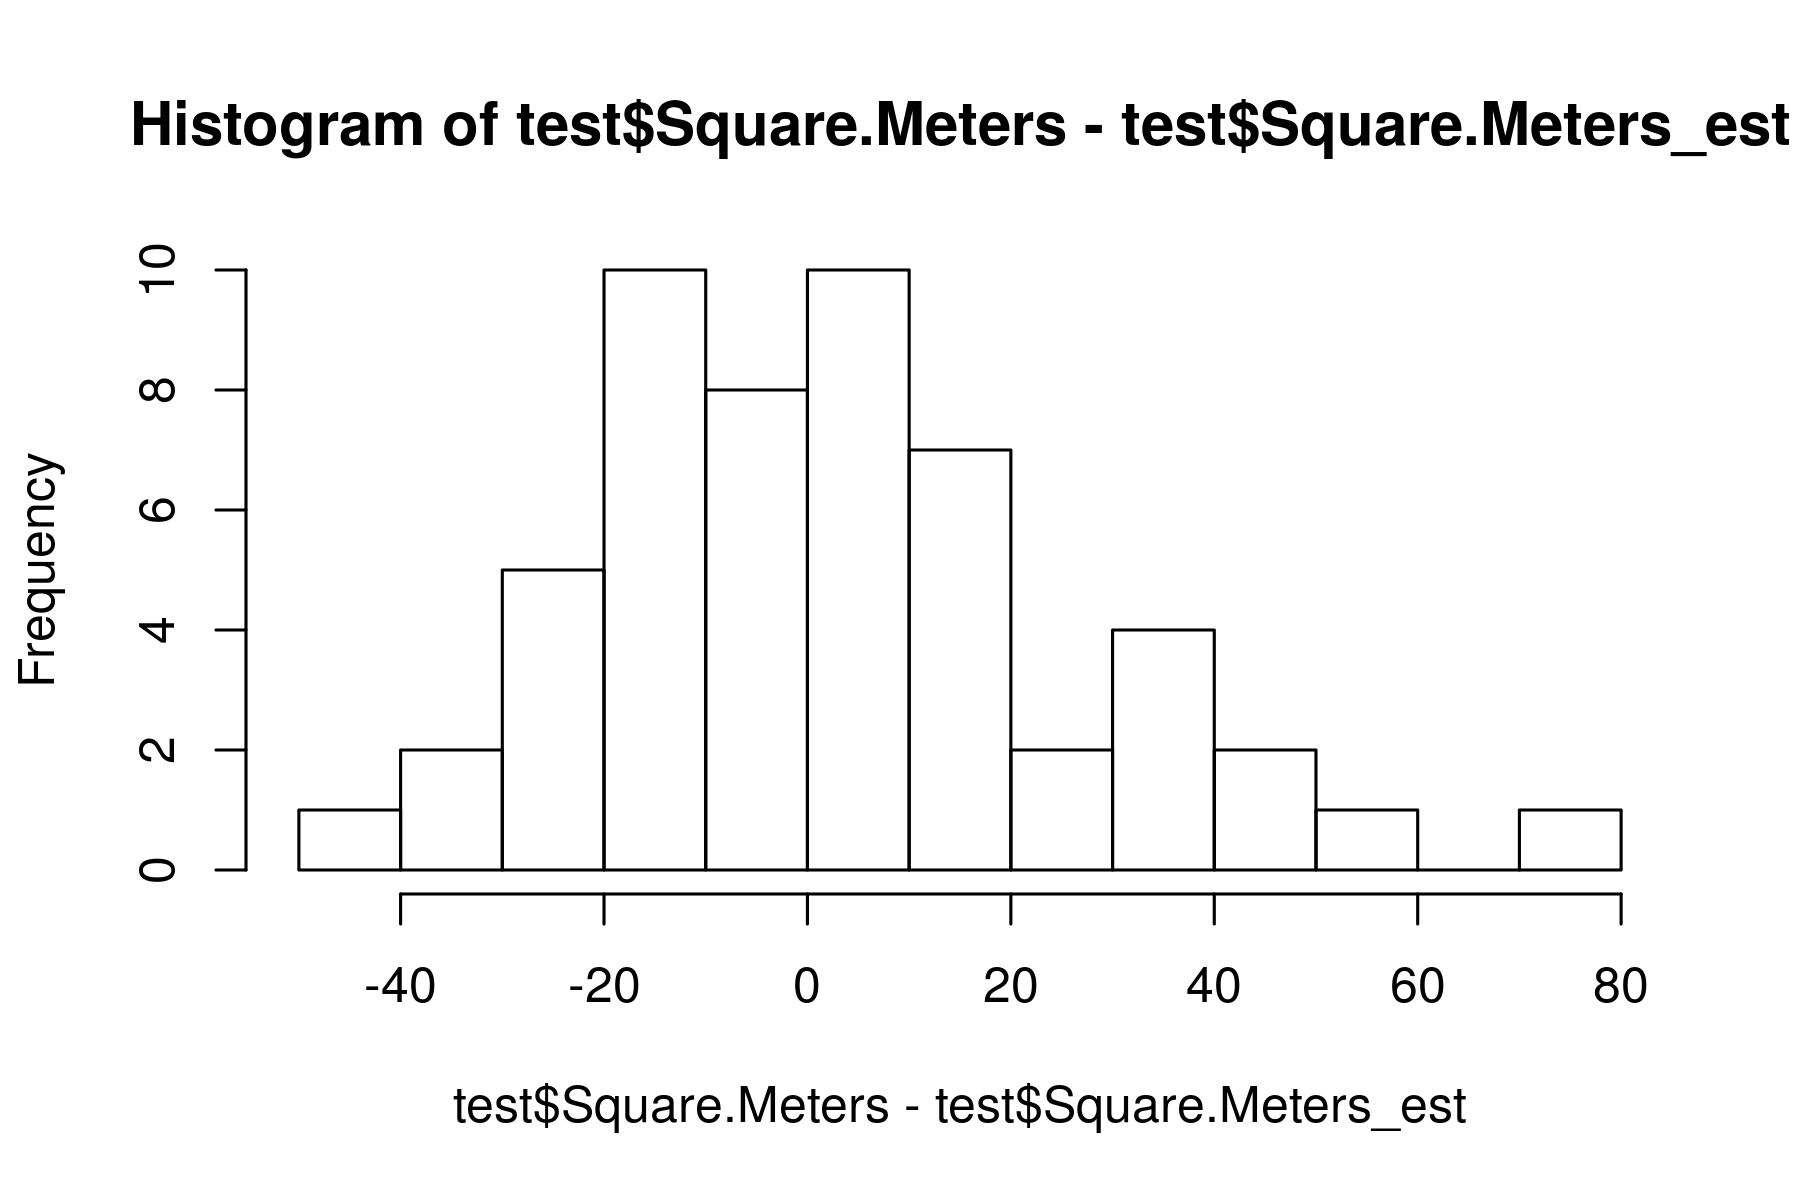

In [95]:
hist(test$Square.Meters-test$Square.Meters_est,15)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [96]:
#El barrio que corresponde a sol es el numero 5. Aplicamos la formula que sale de la regresión lineal para calcular los metros cuadrados:

sol <- data.frame("Accommodates" = 2, "Price" = 120, "Bedrooms" = 1,"neighb_id"=5)

#Pasamos la variable barrio_id a factor
sol$neighb_id = factor(sol$neighb_id)
str(sol)


'data.frame':	1 obs. of  4 variables:
 $ Accommodates: num 2
 $ Price       : num 120
 $ Bedrooms    : num 1
 $ neighb_id   : Factor w/ 1 level "5": 1


In [98]:
#Vamos a aplicar la formula mediante el predict y calcular el resultado
predict(modelo_metros,sol)

1 
43.48786

In [101]:
#El resultado de metros cuadrados variará con cada habitación mas, aumentando:
modelo_metros$coefficients['Bedrooms']
#14,77 metros por cada habitación más

Bedrooms 
14.77213

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [102]:
df_madrid$Square.Meters_1<-predict(modelo_metros,df_madrid)

In [116]:
#Rellenamos los metros cuadrados con el modelo en el caso de que sean NA. Tb vamos a forzar a un minimo de 20 metros 

df_madrid_ok <- df_madrid %>% 
  mutate(Square.Meters = ifelse(is.na(Square.Meters), Square.Meters_1, Square.Meters))

#en las predicciones a NA forzamos que los minimos metros cuadrados sean 20 
df_madrid_ok <- df_madrid_ok %>% 
  mutate(Square.Meters = ifelse(is.na(Square.Meters) | Square.Meters<20, 20, Square.Meters))

df_madrid_ok$Square.Meters_1<-NULL

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [117]:
#En primer lugar creamos el vector de las variables que incluiremos en el PCA
pca_madrid <- df_madrid_ok[ , c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','Square.Meters')]

In [107]:
#Creamos un dataframe de entrada para la función que va a calcular la similitud
apartamento = data_frame('Accommodates'=4,'Bathrooms'=1,'Bedrooms'=2,'Beds'=4,'Price'=120,'Guests.Included'=4,
                      'Extra.People'=12,'Review.Scores.Rating'=8,'Latitude'=40.442,'Longitude'=-3.854455,'Square.Meters'=60)

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”


In [118]:
#Creamos la función que devuelve los 5 apartamentos más similares
obtener_similares <- function(df_total,apartamento,df_prediccion){
    #Creamos la matriz de componentes activando el escaladado de los datos
    prairbnb<-prcomp(na.omit(df_total),center = TRUE, scale. = TRUE)

    t_pic=predict(prairbnb,apartamento)
    
    #Calculamos las distancias
    dist<-rep(NA,nrow(prairbnb$x))
    for (i in 1:nrow(prairbnb$x)){
        dist[i]<-sum((t_pic-prairbnb$x[i,])^2)
    }

    lista_similares <-order(dist)[1:5]

    return (df_prediccion[lista_similares,])
    
    }


In [119]:
#Invocamos función y obtenemos indices de los apartamentos similares
obtener_similares(pca_madrid,apartamento,df_madrid_ok)

Neighbourhood Accommodates Bathrooms Bedrooms Beds Price Square.Meters
1372               4            1.0       1        2     42    49.35070    
1994               6            1.5       3        5    195   109.32620    
1979               3            1.0       1        3     50    43.14505    
2046               6            2.0       3        3     98    98.98340    
1499               4            2.5       2        2    180    78.83733    
     Guests.Included Extra.People Review.Scores.Rating Latitude Longitude
1372 2               10            90                  40.38088 -3.741830
1994 2               10           100                  40.41113 -3.700512
1979 1               15           100                  40.45512 -3.766313
2046 1               12            89                  40.42532 -3.704540
1499 3                0            97                  40.46280 -3.688261
     neighb_id
1372 1        
1994 1        
1979 1        
2046 1        
1499 1

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [121]:
#Para responder a esta pregunta, necesitamos la matriz de componentes y posteriormente mediante el LDA ver que variables son más discriminantes respecto al barrio

prairbnb<-prcomp(na.omit(pca_madrid),center = TRUE, scale. = TRUE)

In [122]:
#A la matriz de componentes que obtenemos del PCA, le tenemos que agregar la columna del barrio:
df_madrid_ok_2=na.omit(df_madrid_ok)
df_madrid_ok_3=cbind(as.data.frame(prairbnb$x),neighb_id = df_madrid_ok_2$neighb_id)
str(df_madrid_ok_3)

'data.frame':	6605 obs. of  12 variables:
 $ PC1      : num  -1.922 -1.442 3.993 0.628 0.514 ...
 $ PC2      : num  -0.46873 1.81376 -0.00677 -0.18958 0.33814 ...
 $ PC3      : num  0.531 -0.706 -0.517 -0.52 0.724 ...
 $ PC4      : num  1.047 0.698 -0.392 0.882 1.5 ...
 $ PC5      : num  -0.5982 1.5135 -0.0439 -0.1609 -0.4135 ...
 $ PC6      : num  0.355 -0.619 0.529 0.556 0.139 ...
 $ PC7      : num  -0.148 -0.786 -0.451 0.217 0.339 ...
 $ PC8      : num  -0.102 -0.309 -0.172 1.355 1.24 ...
 $ PC9      : num  -0.298 -0.289 1.274 -0.481 -0.26 ...
 $ PC10     : num  0.1963 0.2516 0.486 -0.0658 -0.6015 ...
 $ PC11     : num  0.013 0.0769 -0.0679 0.1547 0.2511 ...
 $ neighb_id: Factor w/ 7 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


In [123]:
#Aplicamos el LDA y vemos que componentes son los más discriminantes

library(MASS)
modelo_lda = lda(neighb_id ~ .,data=df_madrid_ok_3)
modelo_lda


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
lda(neighb_id ~ ., data = df_madrid_ok_3)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.58728236 0.11355034 0.03724451 0.03209690 0.18092354 0.02785768 0.02104466 

Group means:
          PC1         PC2          PC3         PC4         PC5         PC6
1 -0.15987988 -0.07073673  0.008354846  0.04116325  0.09115648 -0.02543569
2  0.13346163 -0.07299854  0.056380128 -0.09634509  0.12292108  0.01218299
3  0.48395889 -0.06094628  0.259842117 -0.13130937  0.62409793 -0.26745681
4  1.38290766  0.97132420  0.003574386  0.01647270 -0.46410546  0.13565149
5 -0.04918170 -0.22339399 -0.059985369  0.03199493 -0.32098419  0.07257322
6  0.91332524  1.42211369 -0.358661080 -0.40693653 -0.42638353 -0.11034734
7 -0.01030352  1.03234256 -0.012203732 -0.15799378 -0.27981188  0.43268321
           PC7          PC8         PC9         PC10        PC11
1 -0.009329692  0.003033996 -0.00808893  0.033851459  0.06426944
2 -0.047993490  0.02

In [124]:
#La matriz de rotación es la siguiente: Aqui veremos la relación de los componentes con las variables del dataframe
prairbnb$rotation

PC1        PC2         PC3         PC4          
Accommodates         0.40919023 -0.08376029  0.05457161 -0.0942270622
Bathrooms            0.34396387  0.12817884  0.11293891  0.1967063678
Bedrooms             0.39682882  0.03871383  0.13826416  0.0271553513
Beds                 0.39275440 -0.02569985  0.09904890 -0.0532398091
Price                0.33738197  0.07774443  0.08602648  0.2185135931
Guests.Included      0.29460947 -0.20982169 -0.34367246 -0.2159367357
Extra.People         0.14077087 -0.28514430 -0.71797372 -0.2873757453
Review.Scores.Rating 0.02091984 -0.00491516 -0.44049841  0.8547972507
Latitude             0.02148315  0.65014457 -0.21389079 -0.1831554035
Longitude            0.02868690  0.64488211 -0.25669574 -0.0875787265
Square.Meters        0.42469189  0.06658444  0.09306277 -0.0001305879
                     PC5         PC6        PC7         PC8         
Accommodates         -0.07013632 -0.2423540  0.09875545 -0.047293277
Bathrooms             0.13199392  0.4694369 -0.13183173  0.742314552
Bedrooms             -0.06600599 -0.1657487  0.24061904  0.024433201
Beds                 -0.08910302 -0.2844940  0.21493477  0.027765281
Price                 0.22046561  0.5250208 -0.19895342 -0.653328365
Guests.Included      -0.04894350 -0.2302080 -0.78941333  0.040737365
Extra.People          0.09177462  0.3341382  0.42340026  0.020295834
Review.Scores.Rating -0.01016037 -0.2678335  0.03912220  0.005874176
Latitude              0.65329614 -0.2639307  0.01102485  0.009340991
Longitude            -0.69011110  0.1557664 -0.03916451 -0.050298221
Square.Meters        -0.05279030 -0.0808437  0.15350467 -0.117488220
                     PC9         PC10          PC11        
Accommodates          0.31246551 -0.6635902416  0.447280891
Bathrooms             0.07706177 -0.0404223675  0.005838572
Bedrooms             -0.67608046  0.3131093077  0.419198743
Beds                  0.58183300  0.5804665225 -0.145338426
Price                 0.10293704  0.1022543783  0.115135157
Guests.Included      -0.11122221  0.1026445367 -0.036197488
Extra.People         -0.01809750  0.0269184738  0.001559449
Review.Scores.Rating  0.02178945 -0.0306642008 -0.001685595
Latitude              0.01501544 -0.0086155435  0.024322299
Longitude             0.04569539  0.0003046903  0.055434438
Square.Meters        -0.27336810 -0.3167082639 -0.764734388

### Por lo comentado en el slack y lo que puede un poco verse en el caso de LDA, el componente más significativo si nos fijamos en el LDA(97% de peso) es el PC2. Si nos fijamos en el PC2, tanto las variables latitud cómo longitud tienen un coeficiente alto. Podríamos considerar a PC2 el mejor componente para este caso